In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf 

In [0]:
from pandas_datareader import data
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Saving Kuantan1975-2017New.csv to Kuantan1975-2017New (1).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Kuantan1975-2017New.csv']))
print(df,sep=',')
df.head()

                  Date  Year  Month  Day  KUANTAN[mm]
0        1/1/1975 0:00  1975      1    1          0.5
1        1/2/1975 0:00  1975      1    2        131.3
2        1/3/1975 0:00  1975      1    3         10.8
3        1/4/1975 0:00  1975      1    4        240.5
4        1/5/1975 0:00  1975      1    5         18.1
...                ...   ...    ...  ...          ...
15690  12/27/2017 0:00  2017     12   27          2.6
15691  12/28/2017 0:00  2017     12   28         20.6
15692  12/29/2017 0:00  2017     12   29         49.4
15693  12/30/2017 0:00  2017     12   30         14.4
15694  12/31/2017 0:00  2017     12   31         61.4

[15695 rows x 5 columns]


,Date,Year,Month,Day,KUANTAN[mm]
0,1/1/1975 0:00,1975,1,1,0.5
1,1/2/1975 0:00,1975,1,2,131.3
2,1/3/1975 0:00,1975,1,3,10.8
3,1/4/1975 0:00,1975,1,4,240.5
4,1/5/1975 0:00,1975,1,5,18.1


In [0]:
df1= df.loc[:, 'KUANTAN[mm]']
df1.shape

(15695,)

In [0]:
def convert2matrix(data_arr, look_back):
 X, Y =[], []
 for i in range(len(data_arr)-look_back):
  d=i+look_back  
  X.append(data_arr[i:d])
  Y.append(data_arr[d])
 return np.array(X), np.array(Y)

In [0]:
#Split data set into testing dataset and train dataset
train_size = 11000
train, test = df1.values[0:train_size],df1.values[train_size:len(df1.values)]
# setup look_back window 
look_back = 43
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

In [0]:
print(trainX.shape)
print(testX.shape)

(10957, 43)
(4652, 43)


In [0]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()
model = Sequential()
model.add(Dense(units=32, input_dim=look_back, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1408      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


In [0]:
history = model.fit(trainX, trainY, epochs =100, batch_size = 200, validation_data=(testX, testY), 
          verbose=1, shuffle=False)

Train on 10957 samples, validate on 4652 samples
Epoch 1/100
10957/10957 [==============================] - 0s 17us/step - loss: 852.6428 - mse: 852.6428 - mae: 17.5287 - val_loss: 637.9571 - val_mse: 637.9571 - val_mae: 14.1095
Epoch 2/100
10957/10957 [==============================] - 0s 8us/step - loss: 546.9711 - mse: 546.9710 - mae: 12.6085 - val_loss: 533.0191 - val_mse: 533.0192 - val_mae: 12.6160
Epoch 3/100
10957/10957 [==============================] - 0s 8us/step - loss: 495.2496 - mse: 495.2497 - mae: 11.6579 - val_loss: 500.2128 - val_mse: 500.2128 - val_mae: 12.0436
Epoch 4/100
10957/10957 [==============================] - 0s 8us/step - loss: 473.4864 - mse: 473.4865 - mae: 11.2614 - val_loss: 486.8575 - val_mse: 486.8576 - val_mae: 11.7580
Epoch 5/100
10957/10957 [==============================] - 0s 8us/step - loss: 460.5245 - mse: 460.5244 - mae: 11.0230 - val_loss: 479.0466 - val_mse: 479.0465 - val_mae: 11.5877
Epoch 6/100
10957/10957 [==============================

In [0]:
 import matplotlib.pyplot as plt
 
 def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

Train Root Mean Squared Error(RMSE): 18.19; Train Mean Absolute Error(MAE) : 10.30 
Test Root Mean Squared Error(RMSE): 22.02; Test Mean Absolute Error(MAE) : 12.40 


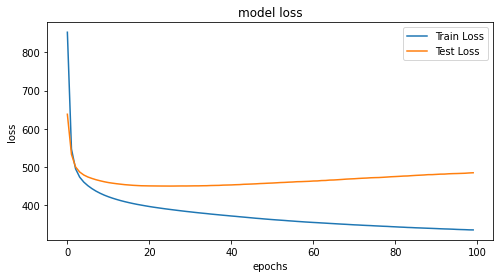

In [0]:
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model.evaluate(testX, testY, verbose=0)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))
model_loss(history)

In [0]:

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print(train_predict.shape)
print(test_predict.shape)

(10957, 1)
(4652, 1)


In [0]:
print(testY.shape)
print(test_predict.shape)

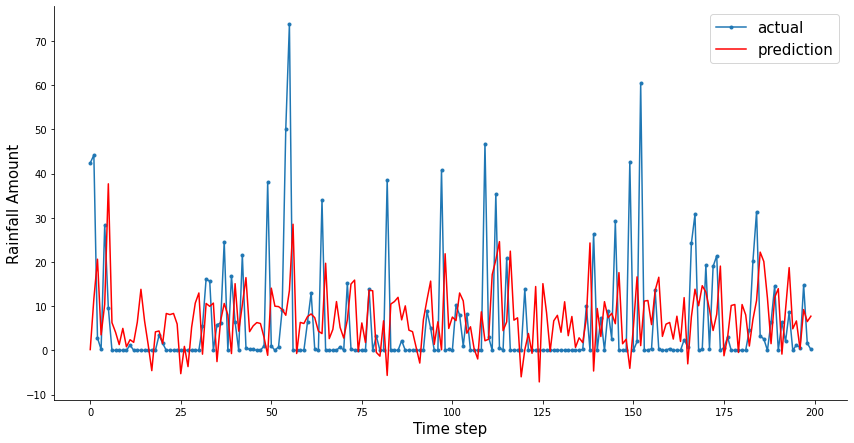

In [0]:
import seaborn as sns

#def prediction_plot(testY, test_predict):
     
len_prediction=[x for x in range(200)]
plt.figure(figsize=(12,6))
plt.plot(len_prediction, testY[:200], marker='.', label="actual")
plt.plot(len_prediction, test_predict[0:200], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Rainfall Amount', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();    